In [31]:
import numpy as np  
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

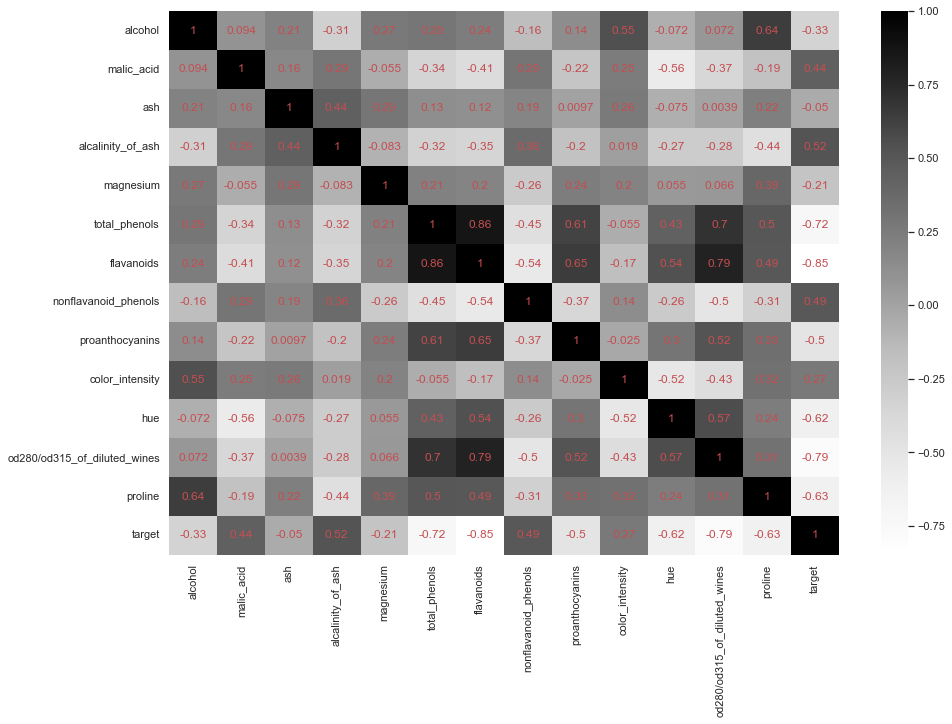

In [32]:
# 데이터 불러오기

wine = load_wine()
wine_data = wine.data
wine_feature = wine.feature_names
df_wine = pd.DataFrame(wine_data, columns = wine_feature)
df_wine['target'] = wine.target 

# 각 변수별 Correlation 확인하여, target과 가장 correlation이 높은 두 가지의 변수만으로 선택

train_corr = df_wine.corr()
sns.set(rc = {'figure.figsize':(15,10)}, font_scale = 1.0)
ax = sns.heatmap(train_corr, annot=True, annot_kws=dict(color='r'), cmap='Greys')

# 이때, od280/od315_of_diluted_wines : 희석 와인의 OD280/OD315 비율과 flavanoids : 플라보노이드 폴리페놀이 가장 높게 나왔으므로, 
# 이 두가지의 변수로 SVM Classification 진행

<AxesSubplot:xlabel='od280/od315_of_diluted_wines', ylabel='flavanoids'>

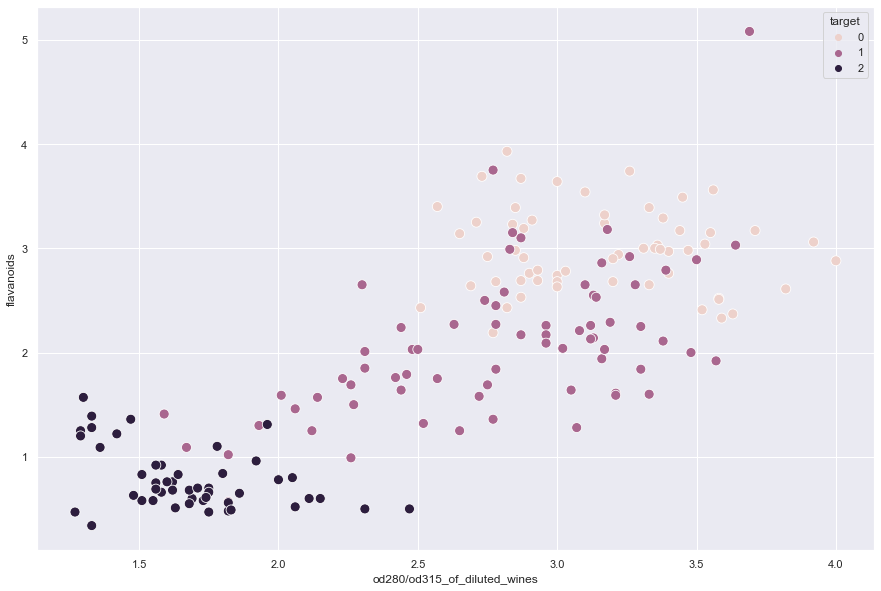

In [33]:
# Train data와 Test data 비율 0.9:0.1 로 맞춰주고 Shuffle

x = df_wine[['od280/od315_of_diluted_wines', 'flavanoids']]
y = df_wine['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, shuffle=True)

sns.scatterplot(x = x['od280/od315_of_diluted_wines'], y = x['flavanoids'], hue=y, s=100)

다음과 같이, 2로 라벨링된 데이터는 다소 떨어져 있으나 1과 0으로 라벨링된 데이터는 겹쳐져 있음을 확인할 수 있다.

In [34]:
# 하이퍼 파라미터 관리

Params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
          'C' : [1 , 50, 100, 150, 200],
          'degree' : [3, 5, 7, 10],
          'coef0' : [0, 1, 50, 70, 100],
          'gamma': [0.1, 1, 5]}

In [35]:
# SVM model setting function

def set_model(kernel, x_train, y_train, C=1.0, degree = 3, coef0=0, gamma = 0.1):
    svm_model = svm.SVC(kernel = kernel, C = C, degree = degree, coef0 = coef0, gamma = gamma).fit(x_train, y_train)
    return svm_model

# 결과 Plot

def plot_model(svm_model, kernel_name, x, y, C=1.0, degree = 3, coef0=0, gamma = 0.1):
    xx = np.linspace(x[x.columns[0]].min()-0.5, x[x.columns[0]].max()+0.5, 30)
    yy = np.linspace(x[x.columns[1]].min()-0.5, x[x.columns[1]].max()+0.5, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    plt.subplot(1,1,1)
    Z = svm_model.predict(xy)
    Z = Z.reshape(XX.shape)
    color_num = 3
    
    plt.contourf(XX, YY, Z,  cmap= plt.cm.get_cmap('plasma', color_num), alpha=0.2)
    plt.scatter(x[x.columns[0]], x[x.columns[1]], c=y, cmap= plt.cm.get_cmap('plasma', color_num))

    plt.xlabel(f'{x.columns[0]}',fontsize = 15)
    plt.ylabel(f'{x.columns[1]}',fontsize = 15)
    plt.xlim(xx[0], xx[-1])
    plt.ylim(yy[0], yy[-1])
    plt.title(f'SVC with {kernel_name} kernel        C={C}    degree={degree}    coef0={coef0}    gamma={gamma}')
    plt.show()

# 성능평가

def get_classifier_eval(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'macro')
    recall = recall_score(y_test, y_pred, average = 'macro')
    f1 = f1_score(y_test , y_pred, average = 'macro')
    print(f'Accuracy:{accuracy:.4f}, Precision :{precision:.4f}, Recall:{recall:.4f}, F1-Score:{f1:.4f}')

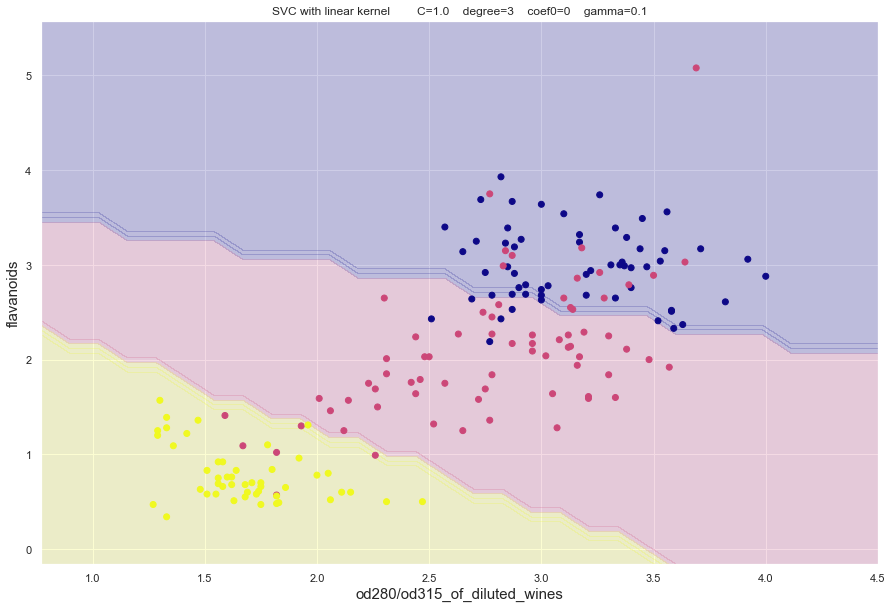

Accuracy:0.8250, Precision :0.8295, Recall:0.8386, F1-Score:0.8334


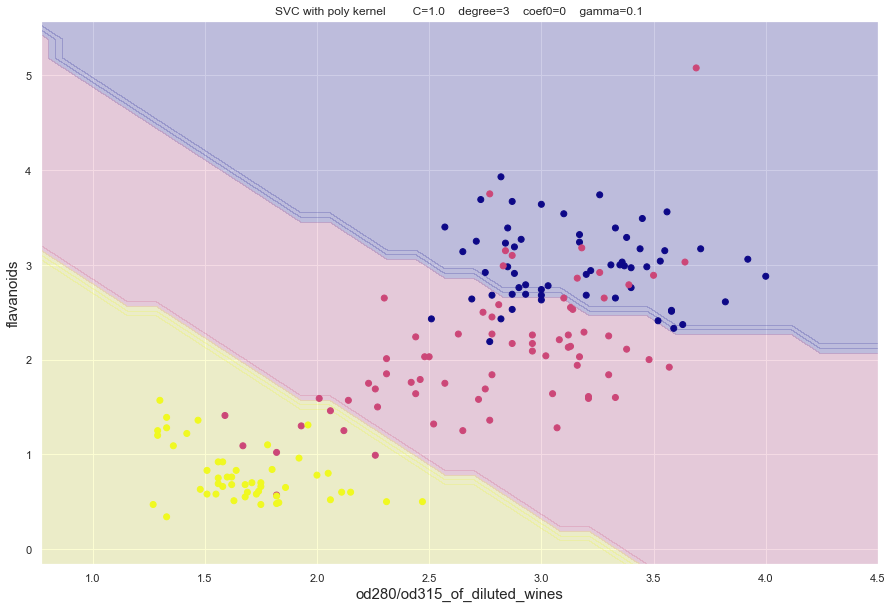

Accuracy:0.8125, Precision :0.8141, Recall:0.8293, F1-Score:0.8198


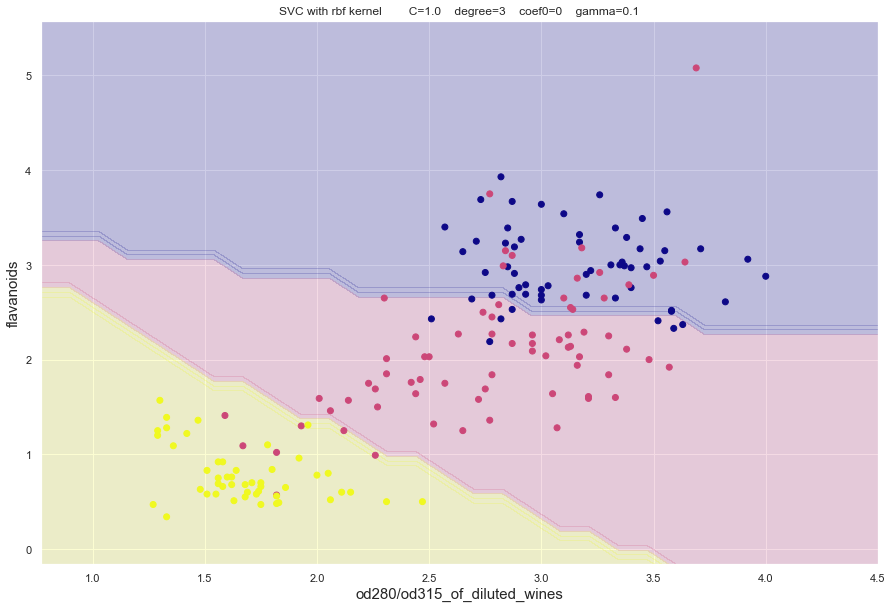

Accuracy:0.8313, Precision :0.8337, Recall:0.8498, F1-Score:0.8376


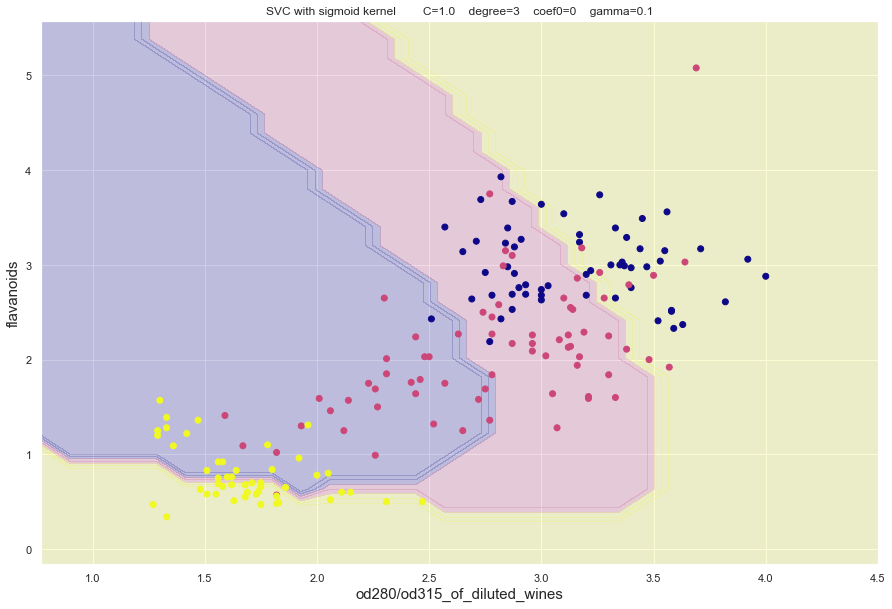

Accuracy:0.3375, Precision :0.3137, Recall:0.3251, F1-Score:0.3184


In [36]:
for kernel in Params['kernel']:
    setmodel = set_model(kernel = kernel, x_train = x_train, y_train = y_train)
    plot_model(svm_model = setmodel, kernel_name = kernel, x=x, y=y)
    get_classifier_eval(setmodel, x_train, y_train)

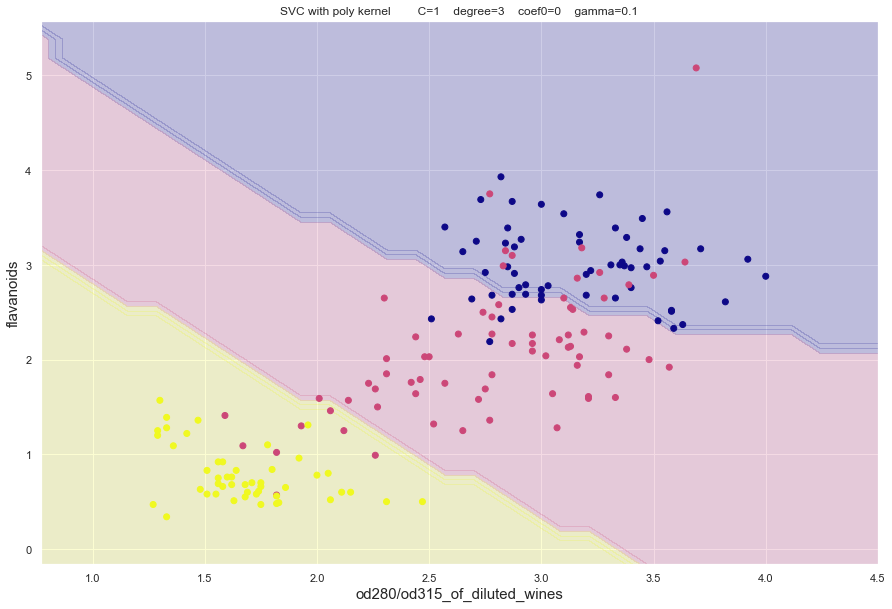

Accuracy:0.8125, Precision :0.8141, Recall:0.8293, F1-Score:0.8198


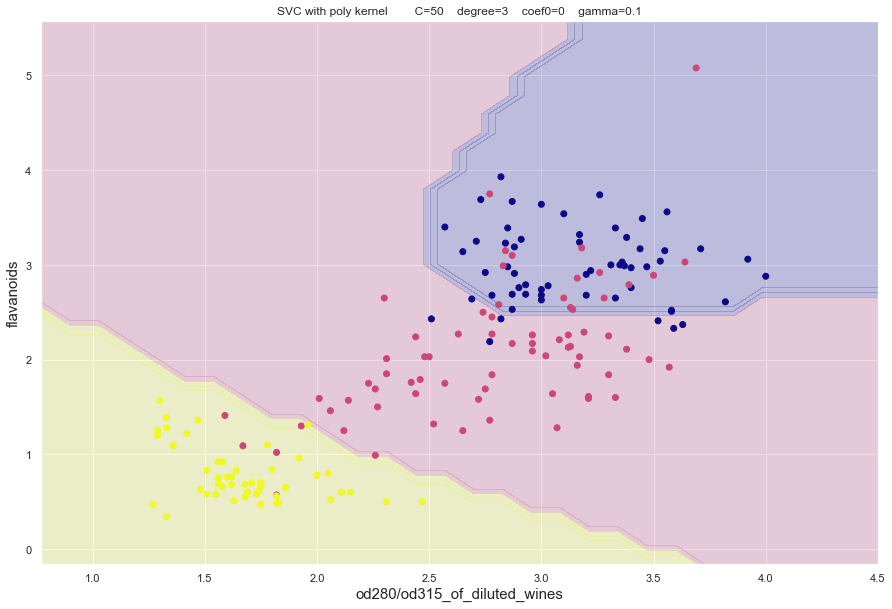

Accuracy:0.8187, Precision :0.8240, Recall:0.8346, F1-Score:0.8277


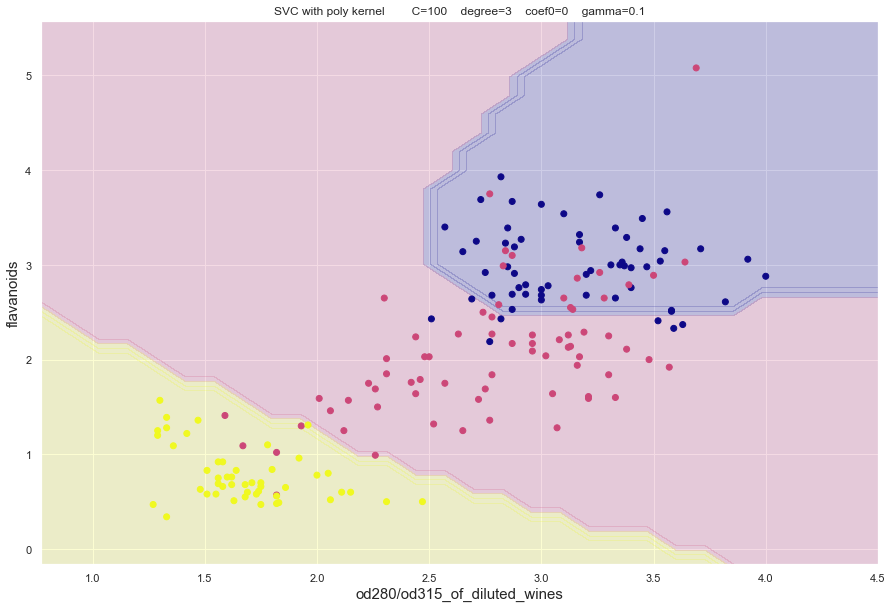

Accuracy:0.8250, Precision :0.8296, Recall:0.8398, F1-Score:0.8335


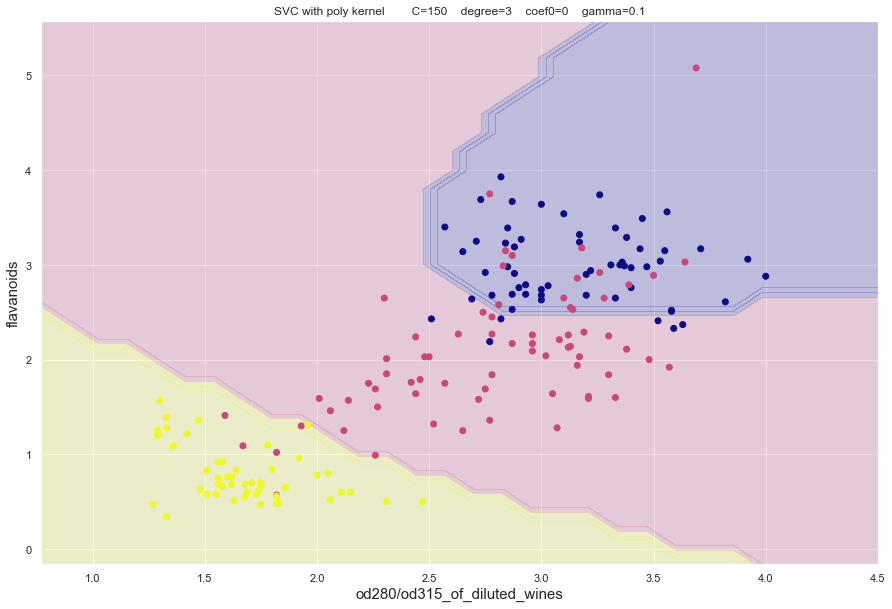

Accuracy:0.8250, Precision :0.8296, Recall:0.8398, F1-Score:0.8335


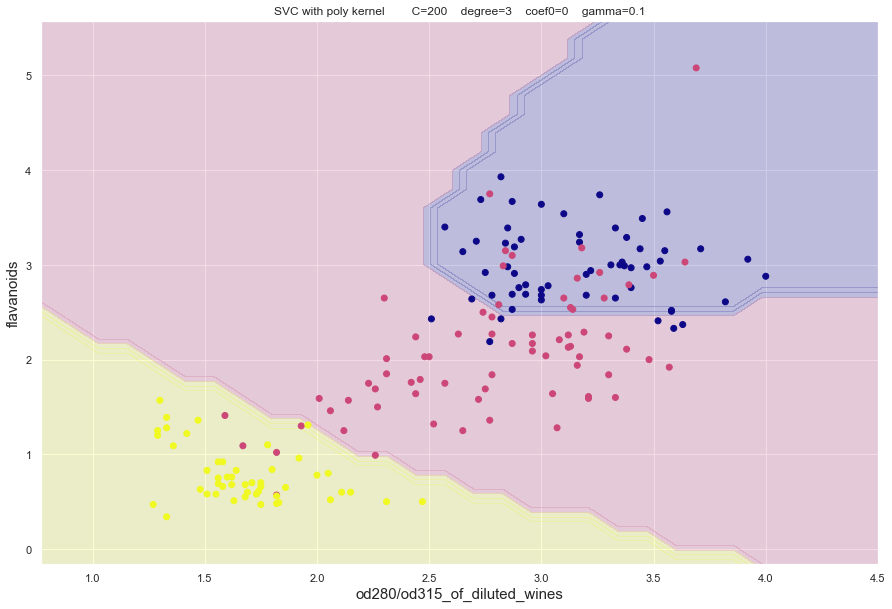

Accuracy:0.8187, Precision :0.8240, Recall:0.8346, F1-Score:0.8277


In [37]:
# C 값만 바꿔서 진행

for i in Params['C']:
    setmodel = set_model(kernel = 'poly', x_train = x_train, y_train = y_train, C=i)
    plot_model(svm_model = setmodel, kernel_name = 'poly', x=x, y=y, C=i)
    get_classifier_eval(setmodel, x_train, y_train)

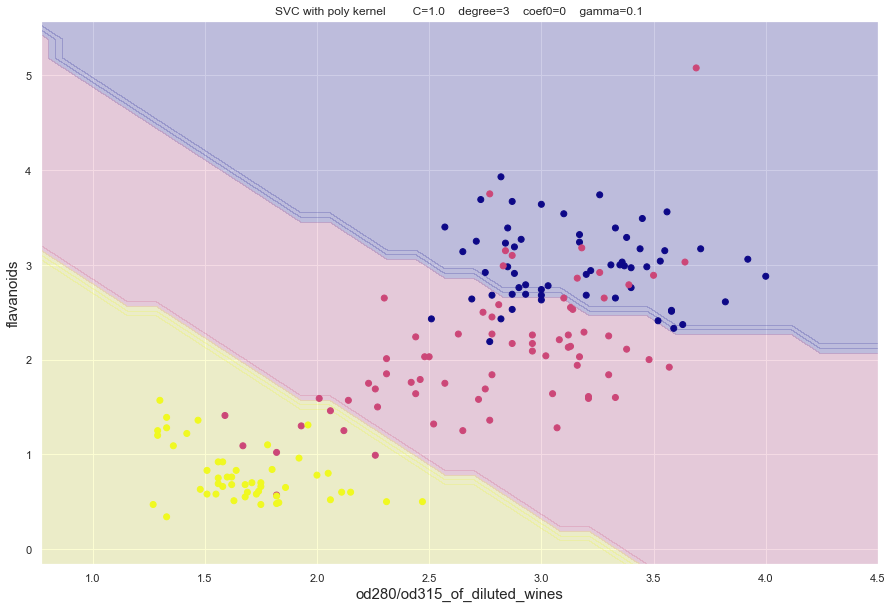

Accuracy:0.8125, Precision :0.8141, Recall:0.8293, F1-Score:0.8198


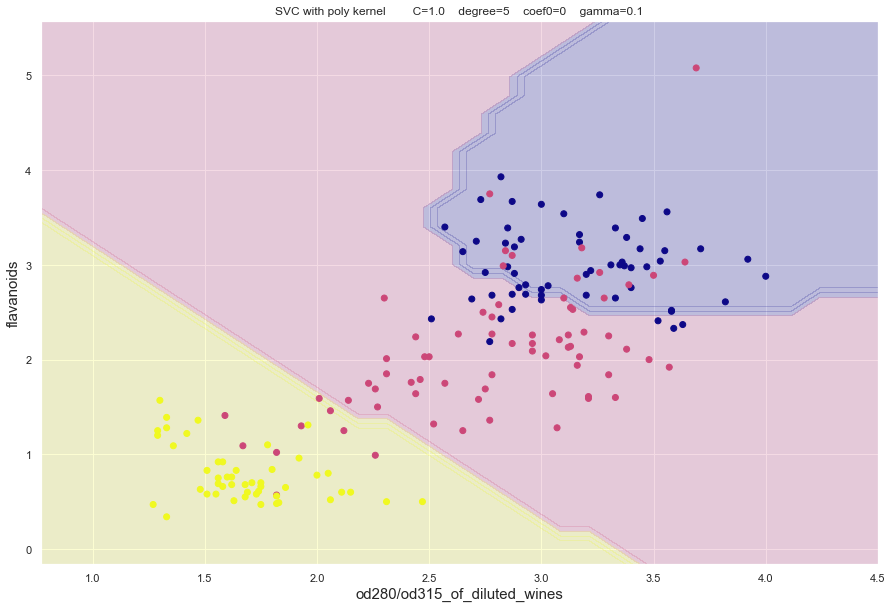

Accuracy:0.7875, Precision :0.7883, Recall:0.8061, F1-Score:0.7944


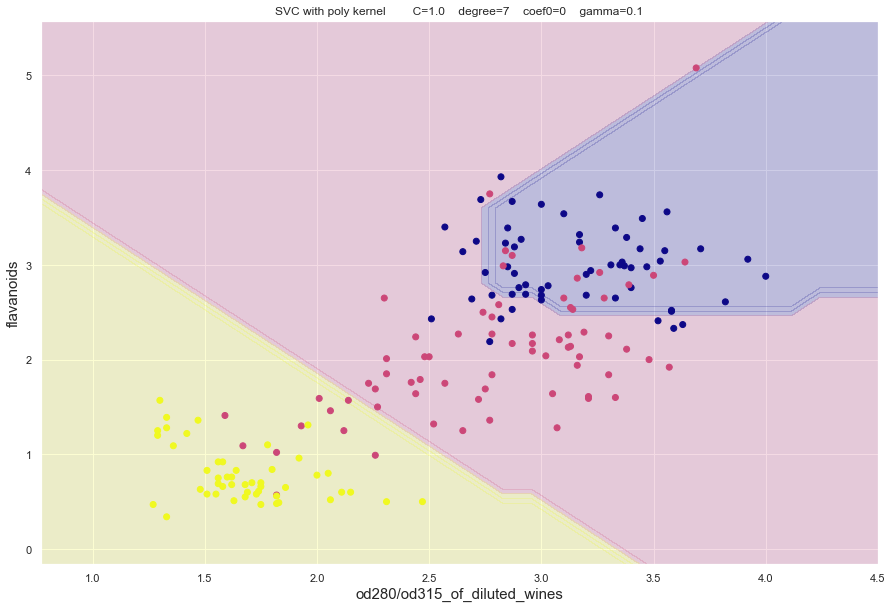

Accuracy:0.7937, Precision :0.7949, Recall:0.8113, F1-Score:0.7996


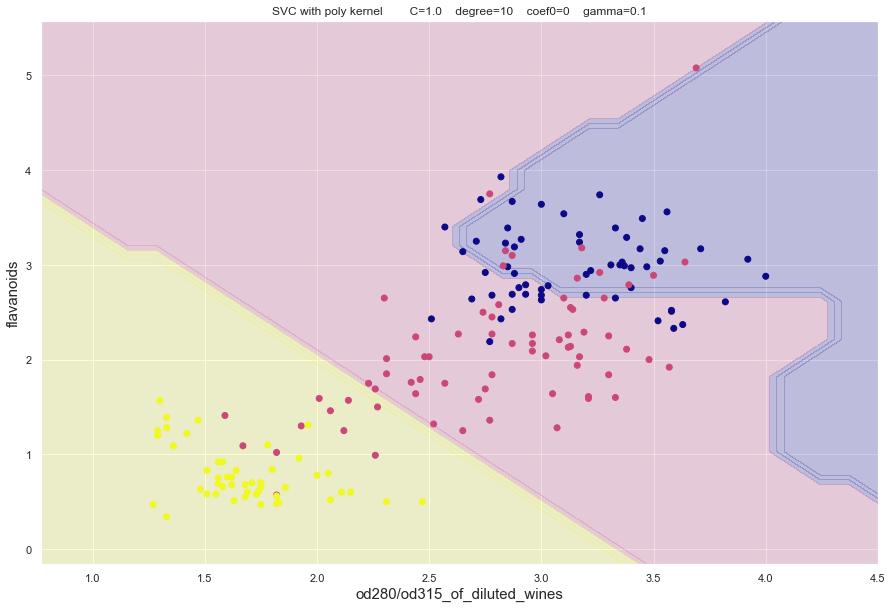

Accuracy:0.7438, Precision :0.7551, Recall:0.7588, F1-Score:0.7471


In [38]:
for i in Params['degree']:
    setmodel = set_model(kernel = 'poly', x_train = x_train, y_train = y_train, degree=i)
    plot_model(svm_model = setmodel, kernel_name = 'poly', x=x, y=y, degree=i)
    get_classifier_eval(setmodel, x_train, y_train)    

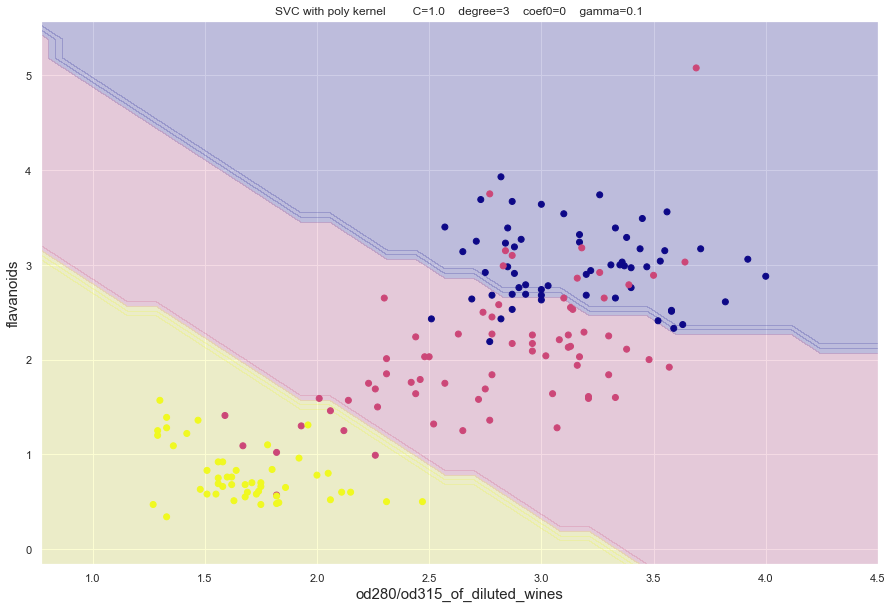

Accuracy:0.8125, Precision :0.8141, Recall:0.8293, F1-Score:0.8198


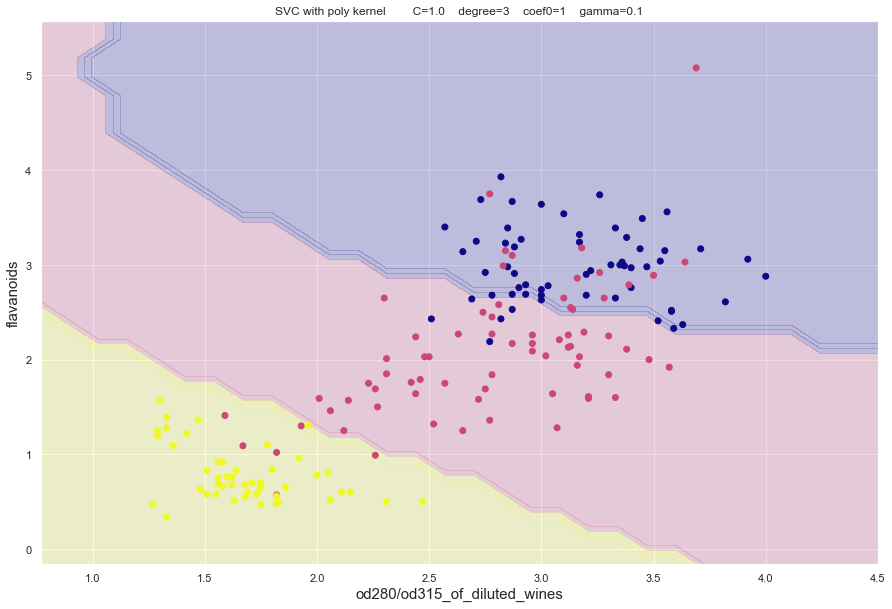

Accuracy:0.8375, Precision :0.8396, Recall:0.8538, F1-Score:0.8434


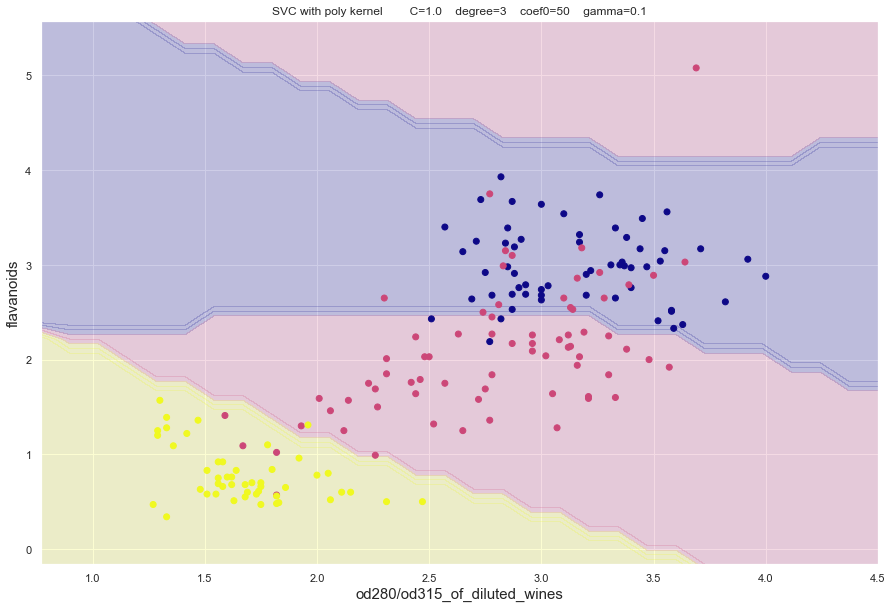

Accuracy:0.8500, Precision :0.8589, Recall:0.8678, F1-Score:0.8564


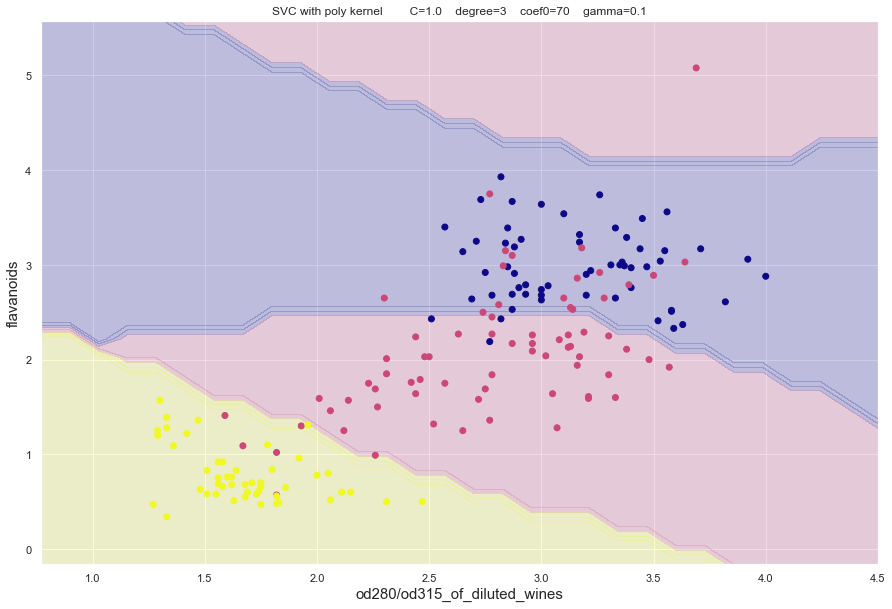

Accuracy:0.8500, Precision :0.8589, Recall:0.8678, F1-Score:0.8564


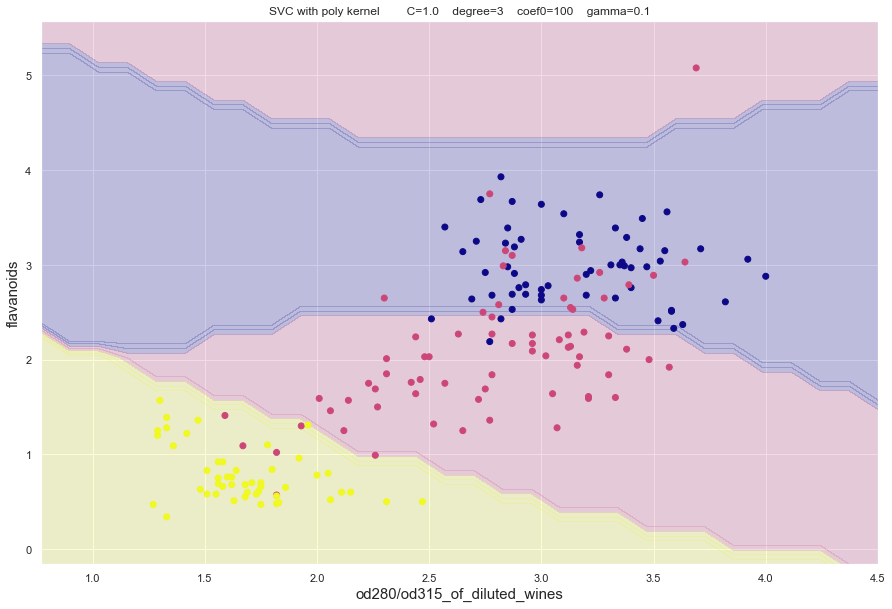

Accuracy:0.8562, Precision :0.8637, Recall:0.8730, F1-Score:0.8624


In [39]:
for i in Params['coef0']:
    setmodel = set_model(kernel = 'poly', x_train = x_train, y_train = y_train, coef0=i)
    plot_model(svm_model = setmodel, kernel_name = 'poly', x=x, y=y, coef0=i)
    get_classifier_eval(setmodel, x_train, y_train)

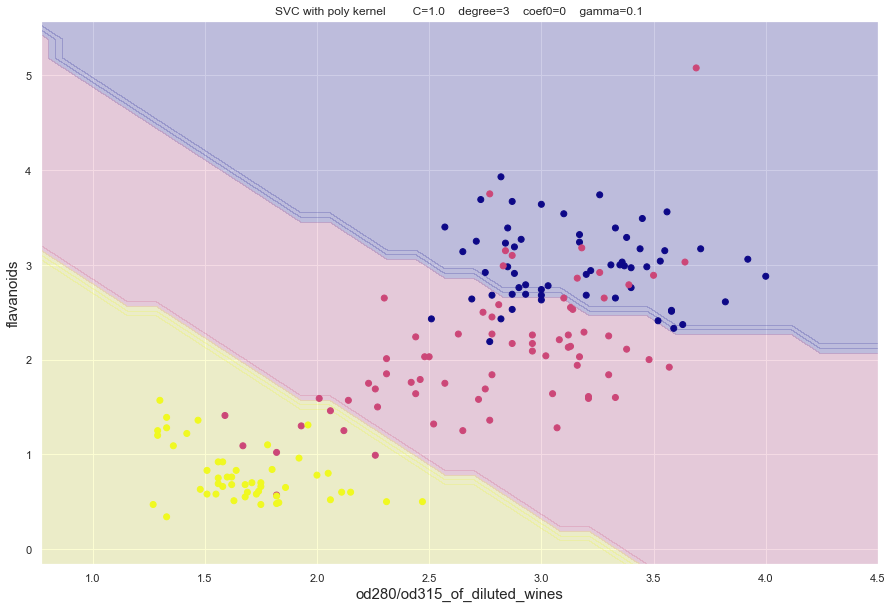

Accuracy:0.8125, Precision :0.8141, Recall:0.8293, F1-Score:0.8198


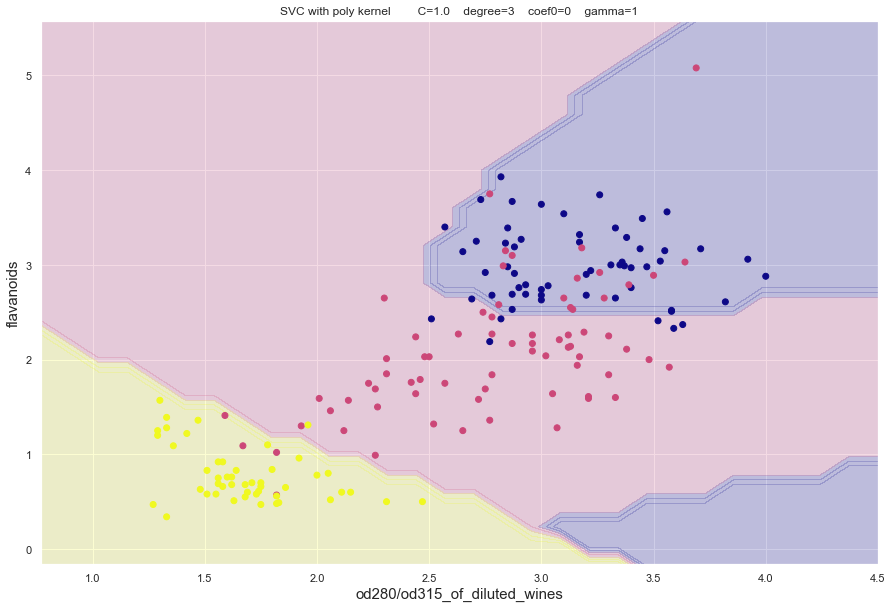

Accuracy:0.8187, Precision :0.8256, Recall:0.8334, F1-Score:0.8287


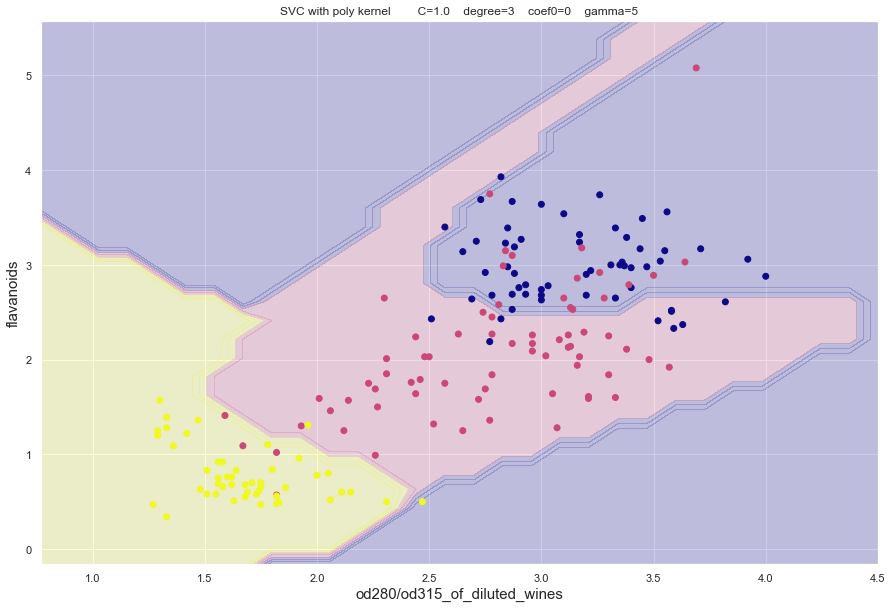

Accuracy:0.8313, Precision :0.8372, Recall:0.8438, F1-Score:0.8402


In [40]:
for i in Params['gamma']:
    setmodel = set_model(kernel = 'poly', x_train = x_train, y_train = y_train, gamma=i)
    plot_model(svm_model = setmodel, kernel_name = 'poly', x=x, y=y, gamma=i)
    get_classifier_eval(setmodel, x_train, y_train)

In [41]:
# Grid_Params = {'kernel':['linear'],
#           'C' : [1 , 50, 100, 150, 200],
#           'degree' : [3, 5, 7, 10],
#           'coef0' : [0, 1, 50, 70, 100],
#           'gamma': [0.1, 1, 5]}

Grid_Params = {'kernel':['sigmoid'],
          'C' : [1 , 50, 100, 150, 200],
          'degree' : [3, 5, 7, 10],
          'coef0' : [0, 1, 50, 70, 100],
          'gamma': [0.1, 1, 5]}

# ['linear', 'poly', 'rbf', 'sigmoid']

In [42]:
grid_svm = GridSearchCV(svm.SVC(), Grid_Params ,refit=True, n_jobs=-1 ,verbose=3)
grid_svm.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 50, 100, 150, 200],
                         'coef0': [0, 1, 50, 70, 100], 'degree': [3, 5, 7, 10],
                         'gamma': [0.1, 1, 5], 'kernel': ['sigmoid']},
             verbose=3)

In [43]:
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)
print('Best Score:', grid_svm.best_score_)
grid_predictions = grid_svm.predict(x_test)
get_classifier_eval(grid_svm, x_test, y_test)

{'C': 1, 'coef0': 0, 'degree': 3, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=1, coef0=0, gamma=1, kernel='sigmoid')
Best Score: 0.4
Accuracy:0.3889, Precision :0.1296, Recall:0.3333, F1-Score:0.1867


{'kernel':['rbf'], 'C' : [1 , 50, 100, 150, 200], 'degree' : [3, 5, 7, 10], 'coef0' : [0, 1, 50, 70, 100], 'gamma': [0.1, 1, 5]} 하이퍼 파라미터의 Grid search 결과

- {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
- Best Score: 0.85

{'kernel':['linear'], 'C' : [1 , 50, 100, 150, 200], 'degree' : [3, 5, 7, 10], 'coef0' : [0, 1, 50, 70, 100], 'gamma': [0.1, 1, 5]} 하이퍼 파라미터의 Grid search 결과

- {'C': 50, 'coef0': 0, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}
- Best Score: 0.825


{'kernel':['poly'], 'C' : [1 , 50], 'degree' : [3, 5]} 하이퍼 파라미터의 Grid search 결과

- {'C': 1, 'degree': 3, 'kernel': 'poly'}
- Best Score: 0.8

{'kernel':['poly'], 'coef0' : [1, 50, 70, 100], 'gamma': [1, 5]} 하이퍼 파라미터의 Grid search 결과

- {'coef0': 1, 'gamma': 1, 'kernel': 'poly'}
- Best Score: 0.8375

{'kernel':['poly'], 'C' : [1], 'degree' : [3], 'coef0' : [1], 'gamma': [1]} 하이퍼 파라미터의 Grid search 결과

- {'C': 1, 'coef0': 1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
- Best Score: 0.8375

{'kernel':['sigmoid'], 'C' : [1 , 50, 100, 150, 200], 'degree' : [3, 5, 7, 10], 'coef0' : [0, 1, 50, 70, 100], 'gamma': [0.1, 1, 5]}  하이퍼 파라미터의 Grid search 결과

- {'C': 1, 'coef0': 0, 'degree': 3, 'gamma': 1, 'kernel': 'sigmoid'}
- Best Score: 0.4